In [29]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import svm
from sklearn.model_selection import train_test_split

In [30]:
players = pd.read_csv('overwatchData.csv')
players.head()

,Player,Eliminations,Deaths,Objective Kills,Objective Time,Damage,Blocked/Reflected,Healing,Ultimate Casts,Win Percentage,Role
0,1,34.28,11.70,10.77,64,15316,0,1235,4.16,0.613,D
1,2,37.36,8.86,12.77,64,14489,0,1176,4.00,0.708,D
2,3,27.64,8.57,6.59,10,13330,0,0,6.18,0.526,D
3,4,3.10,6.54,0.74,56,610,0,15106,15.06,0.586,S
4,5,29.19,8.19,12.46,133,10641,0,8521,21.60,0.759,S


In [31]:
players['KD Ratio'] = players['Eliminations']/players['Deaths']
del players['Role']
players.head()

,Player,Eliminations,Deaths,Objective Kills,Objective Time,Damage,Blocked/Reflected,Healing,Ultimate Casts,Win Percentage,KD Ratio
0,1,34.28,11.70,10.77,64,15316,0,1235,4.16,0.613,2.929915
1,2,37.36,8.86,12.77,64,14489,0,1176,4.00,0.708,4.216704
2,3,27.64,8.57,6.59,10,13330,0,0,6.18,0.526,3.225204
3,4,3.10,6.54,0.74,56,610,0,15106,15.06,0.586,0.474006
4,5,29.19,8.19,12.46,133,10641,0,8521,21.60,0.759,3.564103


There are some statistics that are direct arithmetic combinations of available statistics, such as Kill-Death ratio (the number of Eliminations per life) and similar ratios for each of the damae, blocking, healing stats. These will be added as new columns, since they may correlate with win%.
The dataframe will be edited to remove Role, which is a string category that cannot be analyzed by scikit-learn. Additionally, the additional statistics to be examined will be appended to the dataframe.

In [32]:
players['Objective per Life'] = players['Objective Kills']/players['Deaths']
players['Damage per Life'] = players['Damage']/players['Deaths']
players['Blocked per Life'] = players['Blocked/Reflected']/players['Deaths']
players['Healing per Life'] = players['Healing']/players['Deaths']
players.head()

,Player,Eliminations,Deaths,Objective Kills,Objective Time,Damage,Blocked/Reflected,Healing,Ultimate Casts,Win Percentage,KD Ratio,Objective per Life,Damage per Life,Blocked per Life,Healing per Life
0,1,34.28,11.70,10.77,64,15316,0,1235,4.16,0.613,2.929915,0.920513,1309.059829,0.0,105.555556
1,2,37.36,8.86,12.77,64,14489,0,1176,4.00,0.708,4.216704,1.441309,1635.327314,0.0,132.731377
2,3,27.64,8.57,6.59,10,13330,0,0,6.18,0.526,3.225204,0.768961,1555.425904,0.0,0.000000
3,4,3.10,6.54,0.74,56,610,0,15106,15.06,0.586,0.474006,0.113150,93.272171,0.0,2309.785933
4,5,29.19,8.19,12.46,133,10641,0,8521,21.60,0.759,3.564103,1.521368,1299.267399,0.0,1040.415140


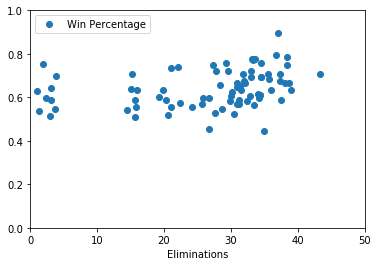

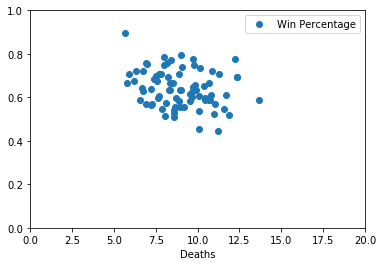

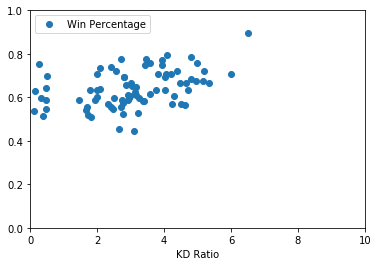

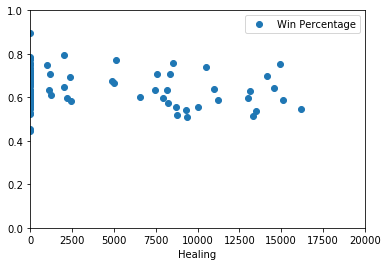

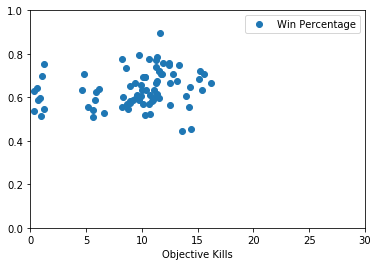

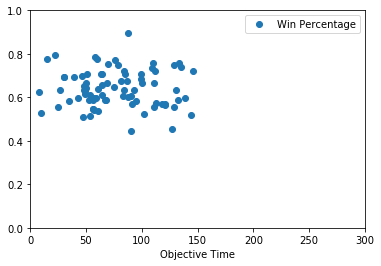

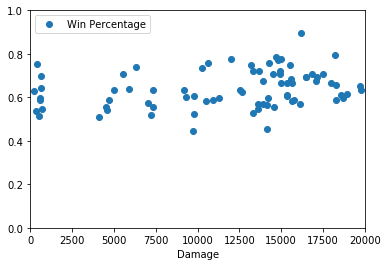

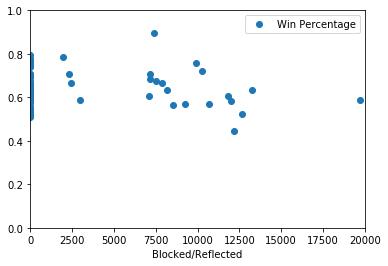

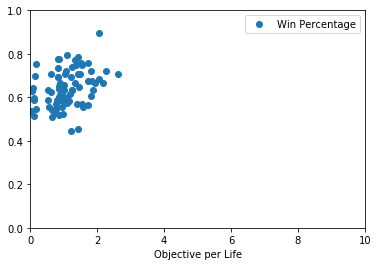

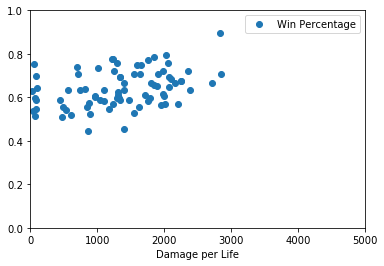

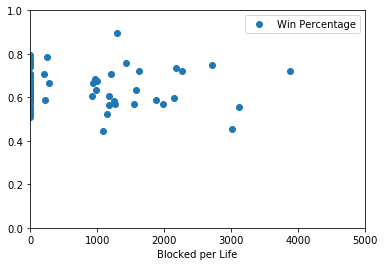

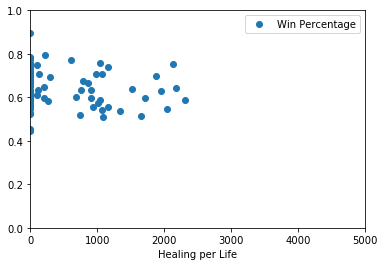

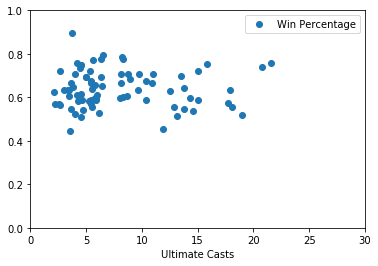

In [33]:
players.plot(x='Eliminations', y='Win Percentage', style='o', ylim=(0,1),xlim=(0,50))
plt.savefig('elims.png')
players.plot(x='Deaths', y='Win Percentage', style='o', ylim=(0,1),xlim=(0,20))
plt.savefig('deaths.png')
players.plot(x='KD Ratio', y='Win Percentage', style='o', ylim=(0,1),xlim=(0,10))
plt.savefig('cupcake.png')
players.plot(x='Healing', y='Win Percentage', style='o', ylim=(0,1),xlim=(0,20000))
plt.savefig('heals.png')
players.plot(x='Objective Kills', y='Win Percentage', style='o', ylim=(0,1),xlim=(0,30))
plt.savefig('okills.png')
players.plot(x='Objective Time', y='Win Percentage', style='o', ylim=(0,1),xlim=(0,300))
plt.savefig('otime.png')
players.plot(x='Damage', y='Win Percentage', style='o', ylim=(0,1),xlim=(0,20000))
plt.savefig('damage.png')
players.plot(x='Blocked/Reflected', y='Win Percentage', style='o', ylim=(0,1),xlim=(0,20000))
plt.savefig('block.png')
players.plot(x='Objective per Life', y='Win Percentage', style='o', ylim=(0,1),xlim=(0,10))
plt.savefig('objkper.png')
players.plot(x='Damage per Life', y='Win Percentage', style='o', ylim=(0,1),xlim=(0,5000))
plt.savefig('damageper.png')
players.plot(x='Blocked per Life', y='Win Percentage', style='o', ylim=(0,1),xlim=(0,5000))
plt.savefig('blockper.png')
players.plot(x='Healing per Life', y='Win Percentage', style='o', ylim=(0,1),xlim=(0,5000))
plt.savefig('healper.png')
players.plot(x='Ultimate Casts', y = 'Win Percentage', style ='o', ylim=(0,1), xlim=(0,30))
plt.savefig('ultcorr.png')
plt.show()

Next we will examine a statistic that should value a player's contribution regardless of role: the sum of damage, blocking, and healing. This statistics called StatSum is a quantitative measure of a player/hero combination's versatility. 

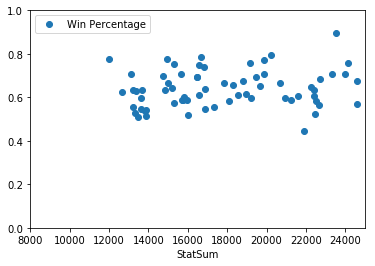

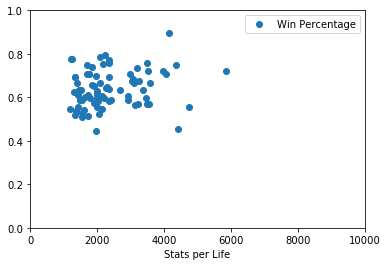

In [34]:
players['StatSum'] = players['Damage']+players['Blocked/Reflected']+players['Healing']
players['Stats per Life'] = players['StatSum']/players['Deaths']
players.plot(x='StatSum', y='Win Percentage', style='o', ylim=(0,1),xlim=(8000,25000))
plt.savefig('statsum.png')
players.plot(x='Stats per Life', y='Win Percentage', style='o', ylim=(0,1),xlim=(0,10000))
plt.savefig('sumper.png')
plt.show()

After preprocessing the data, several inferences can be made about the correlation of data points with win%. First, adding the "per life" qualifier seems to increase the correlation of the associated stats. This agrees with intuition, as damage per life represents a player's ability to impact a fight before being killed and removed from the action.

Second, eliminations (and KD Ratio) look to have the strongest correlation with win%. Although Overwatch prides itself on being a team-oriented game, the players who eliminate opposing players will be the most valuable. 

Third, StatSum and StatSum per Life strengthen the correlation of Damage, Healing, and Blocking. This strengthens the hypothesis that Overwatch reward versatility in its players. Players that combine to effectively produce two of the three Individual Statistics will be more valuable than those that are one-dimentional. (No character in Overwatch is capable of produce all three Stats)

In [35]:
target = players['Win Percentage']
target *= 1000
data = players
del data['Win Percentage']
del data['Player']

In [36]:
data.head()

,Eliminations,Deaths,Objective Kills,Objective Time,Damage,Blocked/Reflected,Healing,Ultimate Casts,KD Ratio,Objective per Life,Damage per Life,Blocked per Life,Healing per Life,StatSum,Stats per Life
0,34.28,11.70,10.77,64,15316,0,1235,4.16,2.929915,0.920513,1309.059829,0.0,105.555556,16551,1414.615385
1,37.36,8.86,12.77,64,14489,0,1176,4.00,4.216704,1.441309,1635.327314,0.0,132.731377,15665,1768.058691
2,27.64,8.57,6.59,10,13330,0,0,6.18,3.225204,0.768961,1555.425904,0.0,0.000000,13330,1555.425904
3,3.10,6.54,0.74,56,610,0,15106,15.06,0.474006,0.113150,93.272171,0.0,2309.785933,15716,2403.058104
4,29.19,8.19,12.46,133,10641,0,8521,21.60,3.564103,1.521368,1299.267399,0.0,1040.415140,19162,2339.682540


In [37]:
target.head()

0    613.0
1    708.0
2    526.0
3    586.0
4    759.0
Name: Win Percentage, dtype: float64

Since the model resulting from this analysis will be used on data generated in the future, the validity of the model must be checked by splitting the data into training and test data. That will be done using built-in functions from scikit-learn.

In [38]:
x_train,x_test,y_train,y_test = train_test_split(data,target,test_size=0.2,random_state=4)

In [39]:
x_test

,Eliminations,Deaths,Objective Kills,Objective Time,Damage,Blocked/Reflected,Healing,Ultimate Casts,KD Ratio,Objective per Life,Damage per Life,Blocked per Life,Healing per Life,StatSum,Stats per Life
76,21.04,10.14,8.54,109,10287,22032,0,4.48,2.074951,0.842209,1014.497041,2172.781065,0.000000,32319,3187.278107
26,21.00,8.67,8.24,111,7323,0,10031,18.07,2.422145,0.950404,844.636678,0.000000,1156.978085,17354,2001.614764
68,28.35,9.86,9.93,64,18287,0,0,5.80,2.875254,1.007099,1854.665314,0.000000,0.000000,18287,1854.665314
20,15.19,7.67,4.82,51,5521,0,7581,8.10,1.980443,0.628422,719.817471,0.000000,988.396349,13102,1708.213820
19,19.87,9.91,9.99,131,7342,0,7483,17.88,2.005045,1.008073,740.867810,0.000000,755.095863,14825,1495.963673
67,36.02,8.93,11.13,48,12551,0,1101,3.38,4.033595,1.246361,1405.487122,0.000000,123.292273,13652,1528.779395
66,29.91,8.90,8.91,35,15654,0,2426,5.28,3.360674,1.001124,1758.876404,0.000000,272.584270,18080,2031.460674
62,38.31,7.97,11.39,58,14709,1945,0,8.26,4.806775,1.429109,1845.545797,244.040151,0.000000,16654,2089.585947
5,25.74,8.70,9.47,59,11302,0,7919,8.08,2.958621,1.088506,1299.080460,0.000000,910.229885,19221,2209.310345
35,35.47,5.91,15.56,99,16810,7164,0,9.73,6.001692,2.632826,2844.331641,1212.182741,0.000000,23974,4056.514382


Since win% is a continuous target variable, the underlying prediction problem must be solved by a regression model. The model must predict values for win% as accurately as possible while also maintaining a manageable mathematical formula for future computations.

The first algorithm to be used will be the simplest form of linear regression. Based on the nature of the algorithm, it should produce the simplest equation at the expense of accuracy. Additionally, we shall be using Ridge regression and support vector regression. All of the regression models will be initialized here.

In [55]:
lin = linear_model.LinearRegression()
rid = linear_model.Ridge(alpha=0.5)
svr = svm.SVR(kernel='linear')

In [41]:
lin.fit(x_train, y_train)
lin.coef_

array([ -1.66204134e+01,   1.18831842e+01,   4.68145187e+00,
        -1.78008928e-01,   3.69407614e-02,  -1.91839817e-02,
        -1.04567065e-02,   1.65977669e+00,   2.44605907e+02,
        -1.35842793e+02,  -3.48131576e-01,   1.54091708e-01,
         1.73783065e-01,   7.30007129e-03,  -2.02568033e-02])

In [44]:
a = lin.predict(x_test)
a

array([ 533.32225568,  655.98253981,  614.0187132 ,  602.59385728,
        569.36819474,  657.93292405,  648.74787826,  707.75358159,
        665.86357974,  666.46483873,  681.36416147,  695.31207999,
        686.54565057,  738.24291388,  580.23123173,  703.80558588])

In [45]:
y_test

76    735.0
26    556.0
68    655.0
20    709.0
19    636.0
67    636.0
66    583.0
62    785.0
5     597.0
35    707.0
51    636.0
45    771.0
59    596.0
14    708.0
27    516.0
4     759.0
Name: Win Percentage, dtype: float64

In [49]:
np.sqrt(np.mean((a-y_test)**2))

82.666453530403487

Therefore, using linear regression, the predicted win% using statistical prediction has an average error of approximately 8.2% off of the true value. 

In [50]:
rid.fit(x_train,y_train)
rid.coef_

array([  2.32120866e+00,   3.17081640e+00,  -1.26094263e+01,
        -7.99706205e-02,   1.72457089e-02,  -1.33945164e-02,
        -1.28274834e-03,   1.46449653e+00,   7.03354798e+01,
         2.24312203e+00,  -1.57241855e-01,   9.65679918e-02,
         8.87311368e-02,   2.56859355e-03,   2.80572539e-02])

In [51]:
b = rid.predict(x_test)
b

array([ 533.33806585,  655.73933784,  611.79351232,  598.19481159,
        567.46675708,  651.44851632,  656.07625812,  691.03343755,
        667.49952116,  687.70376399,  690.9099177 ,  697.53152651,
        680.2602694 ,  741.0204284 ,  584.0110095 ,  696.48517889])

In [53]:
np.sqrt(np.mean((b-y_test)**2))

84.537108266332595

The ridge regression algorithm produces similar error. A win% value calculated using only in-game statistics will be within 8.4% of a player's actual winrate.

In [56]:
svr.fit(x_train, y_train)
svr.coef_

array([[ 11.36633646,   5.75146447,   3.92455295,   0.59507814,
          0.01592921,  -0.05061445,   0.02107641,   7.64031608,
          1.33383147,   0.85619197,  -0.1775245 ,   0.35681369,
         -0.08313147,  -0.01360883,   0.09615772]])

In [57]:
c = svr.predict(x_test)
c

array([ 193.7125067 ,  816.88501512,  646.12138074,  604.41297372,
        812.20880847,  739.46720486,  657.09211092,  750.42067706,
        722.59460424,  787.87826597,  710.90716886,  752.38979827,
        736.22693913,  768.29576021,  584.06651013,  923.76303809])

In [58]:
np.sqrt(np.mean(c-y_test)**2)

38.840172656318821

The support vector regression algorithm claims to have the minimum expected error of the three models used. However, through inspection, it can be seen that it produces some wildly inaccurate outliers. The player in x_test[0] has a winrate above 70%, but the svr predicts them to be below 20%. Similarly, the svr predicts a player to have a 93% winrate while their actual winrate is closer to 70%.